##Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings 
warnings.filterwarnings('ignore')
import os


## reading csv file

In [ ]:

data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/CKD/ckd.csv")
data.info()
data.classification.unique() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

## After Replacing

In [ ]:
data.classification=data.classification.replace("ckd\t","ckd") 
data.classification.unique()
data.classification=[1 if each=="ckd" else 0 for each in data.classification]
data.head()
df=data.dropna(axis=0)
print(data.shape)
print(df.shape) 
df.head()
df.index=range(0,len(df),1)
df.head()
df.wc=df.wc.replace("\t6200",6200)
df.wc=df.wc.replace("\t8400",8400) 
print(df.loc[11,["wc"]])
print(df.loc[20,["wc"]])
df.pcv=df.pcv.astype(int)
df.wc=df.wc.astype(int)
df.rc=df.rc.astype(float)
df.info()
dtype_object=df.select_dtypes(include=['object'])
dtype_object.head()
for x in dtype_object.columns:
    print("{} unique values:".format(x),df[x].unique())
    print("*"*20)


(400, 26)
(158, 26)
wc    6200
Name: 11, dtype: object
wc    8400
Name: 20, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    flo

## assigning files

   id   age    bp     sg   al   su  ...  dm  cad  appet  pe  ane  classification
0   3  48.0  70.0  1.005  4.0  0.0  ...   0    0      0   1    1               1
1   9  53.0  90.0  1.020  2.0  0.0  ...   1    0      0   0    1               1
2  11  63.0  70.0  1.010  3.0  0.0  ...   1    0      0   1    0               1
3  14  68.0  80.0  1.010  3.0  2.0  ...   1    1      0   1    0               1
4  20  61.0  80.0  1.015  2.0  0.0  ...   1    1      0   1    1               1

[5 rows x 26 columns]


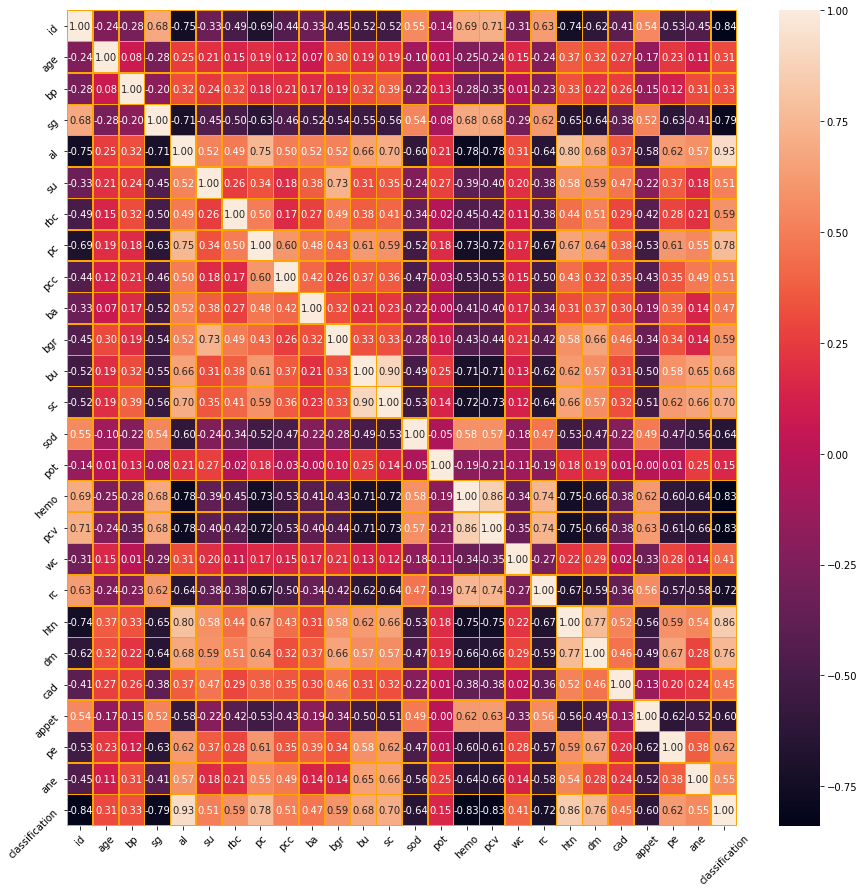

In [ ]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}
df=df.replace(dictonary)
print(df.head())
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
from sklearn.neighbors import KNeighborsClassifier
y=df["classification"].values
x_data=df.drop(["classification"],axis=1)


## Normalisation

In [ ]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

## Prearing the test and training data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)


## Model Acuuracy

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score=[]
algorithms=[]
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)


KNN accuracy = 95.83333333333334


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)


plot

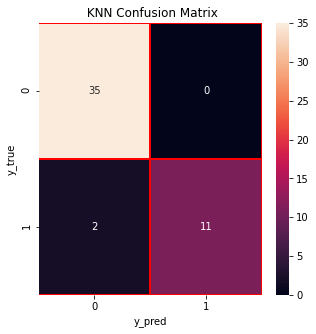

In [ ]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()


## Naive-Bayes

Navie Bayes accuracy = 100.0


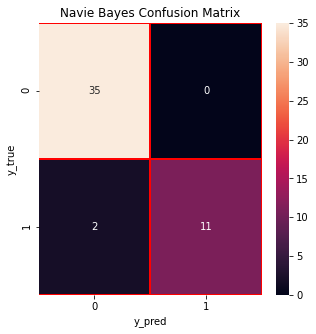

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()



##box-plot

In [ ]:
trace0 = go.Box(
    y=df.bp,
    name = 'Bp',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.sod,
    name = 'Sod',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)
 




##Line plot

In [ ]:
df2=df.copy()
df2["id"]=range(1,(len(df.ba)+1),1)
df2["df2_bp_norm"]=(df2.bp-np.min(df2.bp))/(np.max(df2.bp)-np.min(df2.bp))
df2["df2_hemo_norm"]=(df2.hemo-np.min(df2.hemo))/(np.max(df2.hemo)-np.min(df2.hemo))
#Line Plot
trace1 = go.Scatter(
        x = df2.id,
        y = df2.df2_bp_norm,
        mode = "lines",
        name = "Blood Press.",
        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
        text= df.age)
trace2 = go.Scatter(
        x = df2.id,
        y = df2.df2_hemo_norm,
        mode = "lines+markers",
        name = "Hemo",
        marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
        text= df.age)
data=[trace1,trace2]
layout=dict(title="Blood Press and Hemoglobin values according the age",
            xaxis=dict(title="İd",ticklen=5,zeroline=False))
fig=dict(data=data,layout=layout)
iplot(fig)


##RANDOM FOREST

Random Forest accuracy = 1.0


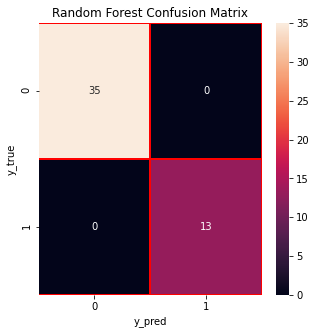

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()


##Support Vector Machine

svm test accuracy = 100.0


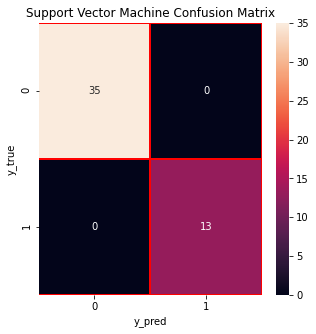

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()


Decision Tree accuracy: 100.0


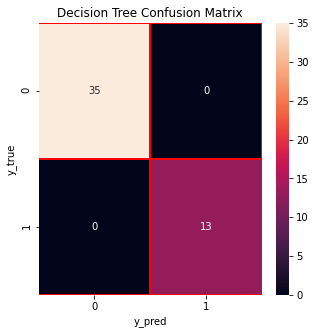

test accuracy 0.9791666666666666


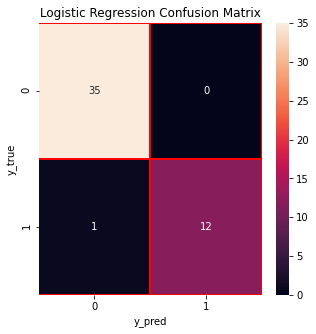

In [ ]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

trace1 = {
  'x': algorithms,
  'y': score,
  'name': 'score',
  'type': 'bar'
}
data = [trace1];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of the accuracy of classification algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)
